#### Задание 1. Bias-Variance decomposition.

Как известно, ошибка алгоритма может быть разложена по формуле bias-variance decomposition на

$$error^2 = bias^2 + variance$$,

где $bias^2$ -- среднеквадратичное отклонение средних ответов алгоритма от истинных ответов, а variance -- среднее отклонение ответов алгоритма от среднего ответа. 

Предлагается оценить bias и variance с помощью бустрапной оценки.

В цикле обучим N моделей, где на шаге i:

1) Выберем n элементов из выборки по схеме выбора с возвращением (функция np.random.choice()). Обучим на ней модель и получим вектор предсказаний $\hat{y}_i$.

2) Вычислим среднее предсказание $\overline{y} = \frac{1}{N}\sum_{i=1}^{N} \hat{y}_i.$

3) Посчитаем среднюю ошибку алгоритма $error=\frac{1}{N}\sum_{i=1}^{N}MSE(y,\hat{y}_i).$

4) Посчитаем смещение: $bias^2 = MSE(y, \overline y)$

5) Посчитаем разброс: $variance = \frac{1}{N}\sum_{i=1}^N MSE(\hat{y}_i, \overline y).$


В качестве алгоритма будем использовать решающее дерево. Данные хранятся в файле $\textbf{blogData_train.csv}$

Постройте графики зависимости $error$, $bias^2$ и $variance$ от глубины решающего дерева (от 1 до 15 включительно) для $N=100$. 

In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [21]:
data = pd.read_csv('blogData_train.csv', header=-1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


In [22]:
len(data)

52397

In [23]:
# Разбейте выборку на train и test в соотношении 1:4

data_train, data_test = train_test_split(data, test_size=0.8)

In [24]:
X_train = data_train.values[:, :-1]
X_test = data_test.values[:, :-1]

y_train = data_train.values[:, -1]
y_test = data_test.values[:, -1]

In [25]:
# Функция подсчета среднего предсказания

def get_mean_prediction(list_of_predictions):
    return np.mean(list_of_predictions, axis=0)

In [26]:
# Напишите функции, которые по вектору ответов и набору из N предсказаний выдают среднюю ошибку,
# bias и variance

def error(y_true, list_of_predictions):
    n = len(list_of_predictions)
    sum_of_mse = 0
    
    for i in range(n):
        sum_of_mse += mean_squared_error(y_true, list_of_predictions[i])
        
    error = sum_of_mse / n
    return error

def bias(y_true, list_of_predictions):
    mean_prediction = get_mean_prediction(list_of_predictions)
    
    bias = mean_squared_error(y_true, mean_prediction)
    return bias

def variance(y_true, list_of_predictions):
    n = len(list_of_predictions)
    sum_of_mse = 0
    
    predictions_mean = get_mean_prediction(list_of_predictions)
    for i in range(n):
        sum_of_mse += mean_squared_error(predictions_mean, list_of_predictions[i])
        
    error = sum_of_mse / n
    return error

In [27]:
x = np.array([1, 2, 3])
y = np.array([[1, 2, 3], [3, 2, 1]])
print(error(x, y))
print(bias(x, y))
print(variance(x, y))

1.3333333333333333
0.6666666666666666
0.6666666666666666


In [29]:
# Эксперимент

N = 10
DEPTHS = np.arange(1, 16)

n_objects = X_train.shape[0]

errors = []
biases = []
variances = []

for depth in tqdm(DEPTHS):
    predictions = []
    for i in range(N):
        
        # Сгенерируем выборку для обучения
    
        indices = np.random.choice(n_objects, size=n_objects)
        X = X_train[indices]
        y = y_train[indices]
    
        # Обучите решающее дерево с глубиной depth на выборке X, y
    
        model = DecisionTreeRegressor(max_depth=depth)
        model.fit(X, y)
    
        predictions.append(model.predict(X_test))
    
    errors.append(error(y_test, predictions))
    biases.append(bias(y_test, predictions))
    variances.append(variance(y_test, predictions))


 20%|██        | 3/15 [00:05<00:20,  1.67s/it]
Exception in thread Thread-4:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.6/dist-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|██████████| 15/15 [00:57<00:00,  3.83s/it]


Постройте графики для ошибки, смещения и разброса. Выполняется ли bias-variance разложение?

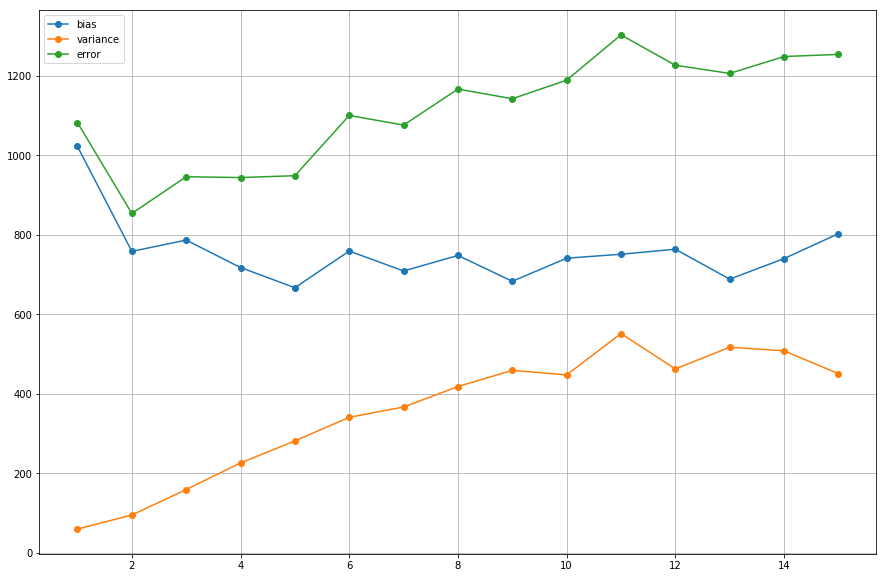

In [31]:
plt.figure(figsize=(15, 10))
plt.plot(DEPTHS, biases, '-o', label = 'bias')
plt.plot(DEPTHS, variances, '-o', label = 'variance')
plt.plot(DEPTHS, errors, '-o', label = 'error')
plt.grid()
plt.legend()
plt.show()

#### Задание 2

Воспользуйтесь для решения задачи классификации в предыдущей задаче алгоритм RandomForest. 
Постройте график зависимости качества (MSE) от числа деревьев.

In [32]:
from sklearn.ensemble import RandomForestRegressor

mse = []
for n_trees in tqdm(np.arange(1, 100, 5)):
    model = RandomForestRegressor(n_estimators=n_trees)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse.append(mean_squared_error(predictions, y_test))

100%|██████████| 20/20 [06:42<00:00, 20.14s/it]


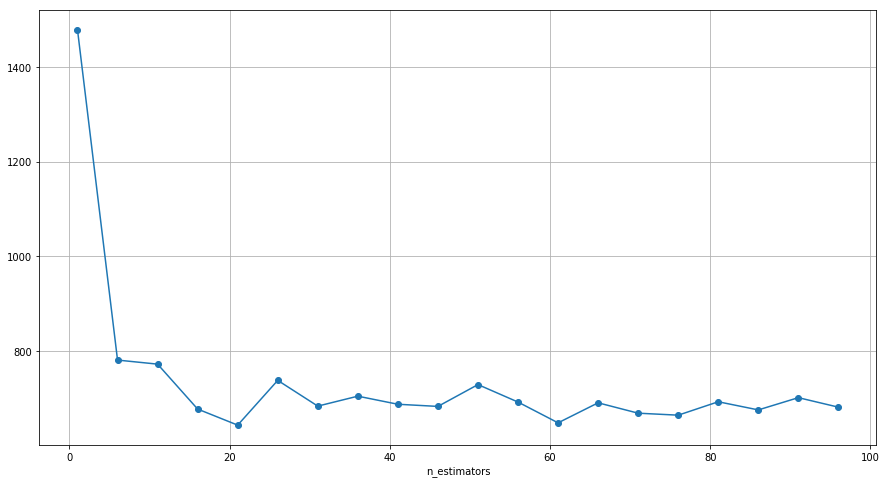

In [33]:
plt.figure(figsize=(15, 8))
plt.plot(np.arange(1, 100, 5), mse, '-o', label='MSE')
plt.xlabel('n_estimators', fontsize=10)
plt.grid()
plt.show()

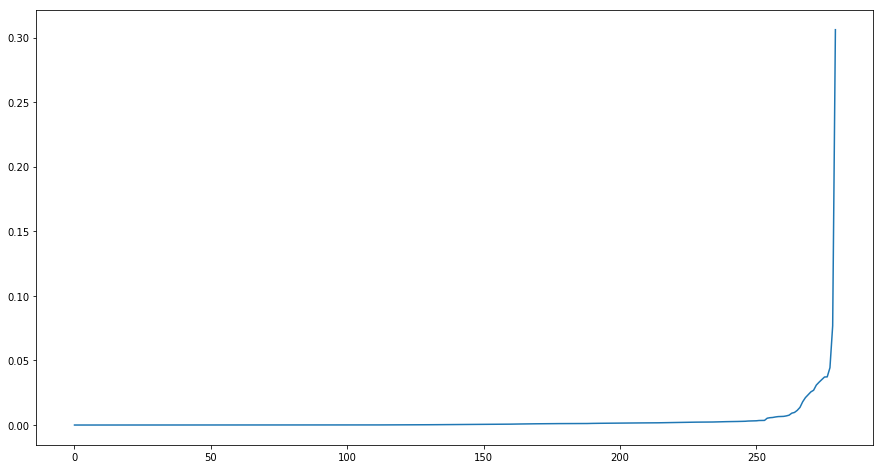

In [36]:
importances = model.feature_importances_
plt.figure(figsize=(15, 8))
plt.plot(np.arange(len(importances)), sorted(importances))

#### Задание 3

Вернемся к задаче предсказания зарплаты. 

В этом задании мы протестируем Blending - метод построения композиции.

Для этого напишите класс Blender, который будет принимать на вход два алгоритма и параметр $\alpha$ -- вес первого алгоритма в итоговом предсказании.

Обучение такой модели состоит в обучении двух исходных моделей, а применение в сумме $y_1 \alpha + y_2 (1 - \alpha)$

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()

In [45]:
class Blender(BaseEstimator, ClassifierMixin):
    def __init__(self, clf1, clf2, alpha):
        self.clf1 = clf1
        self.clf2 = clf2
        self.alpha = alpha
        
    def fit(self, X, y):
        self.clf1.fit(X, y)
        self.clf2.fit(X, y)
        
    def predict(self, X):
        predictions_proba = self.predict_proba(X)[:, 1]
        predictions = (predictions_proba > 0.5).astype(int)
        return predictions
        
    def predict_proba(self, X):
        p1 = self.clf1.predict_proba(X)
        p2 = self.clf2.predict_proba(X)
        return p1 * self.alpha + p2 * (1 - self.alpha)

In [127]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',)
# Назначаем имена колонок
columns = ('age workclass fnlwgt education educ-num marital-status occupation relationship '
           'race sex capital-gain capital-loss  hours-per-week native-country salary')
numeric_indices = np.array([0, 2, 4, 10, 11, 12])
categorical_indices = np.array([1, 3, 5, 6, 7, 8, 9, 13, 14])
df.columns = columns.split() #этот метод разделит датасет по колонкам как в массиве columns
df = df.dropna()
print(df.columns[numeric_indices])

Index(['age', 'fnlwgt', 'educ-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [126]:
df._get_numeric_data()

,age,fnlwgt,educ-num,capital-gain,capital-loss,hours-per-week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
5,49,160187,5,0,0,16
6,52,209642,9,0,0,45
7,31,45781,14,14084,0,50
8,42,159449,13,5178,0,40
9,37,280464,10,0,0,80


In [40]:
df_prc = df.copy()
df_prc['salary'] = df['salary'].apply((lambda x: x==' >50K')) # Будем предсказывать 1(True), если зарплата больше 50K, 0(False) иначе
df_prc.head()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,False
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,False
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,False
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,False
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,False


In [41]:
X = np.array(df_prc[df._get_numeric_data().columns])
y = np.array(df_prc['salary'], dtype='int')

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [46]:
from sklearn.metrics import f1_score

f_scores = []
for alpha in tqdm(np.linspace(0, 1, 20)):
    model = Blender(clf1, clf2, alpha)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    f_scores.append(f1_score(y_test, predictions))

100%|██████████| 20/20 [00:09<00:00,  2.15it/s]


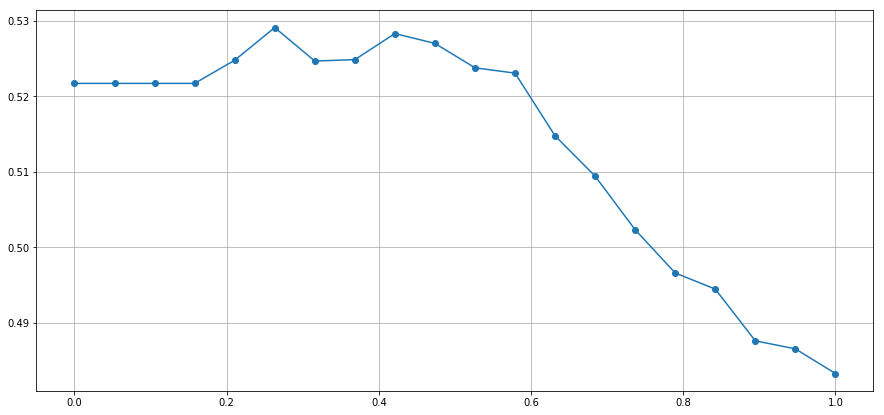

In [47]:
plt.figure(figsize=(15, 7))
plt.plot(np.linspace(0, 1, 20), f_scores, '-o')
plt.grid()
plt.show()

In [48]:
data = pd.read_csv('student-mat.csv')

In [49]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [94]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,16.646753,2.774026,2.553247,1.449351,2.036364,0.309091,3.937662,3.215584,3.111688,1.464935,2.285714,3.563636,5.737662,10.888312,10.677922,10.368831
std,1.198913,1.069633,1.076693,0.702047,0.834620,0.703818,0.896323,0.996225,1.118264,0.868692,1.277379,1.386966,8.062339,3.310415,3.760424,4.591553
min,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,13.000000
max,19.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [92]:
data_train, data_test = train_test_split(data, test_size=85)

In [56]:
data = data[data['age'] != 21]

In [57]:
data = data[data['age'] != 22]

In [121]:
data_train.to_csv('student_grade_train.csv')

In [122]:
data_test.to_csv('student_grade_test.csv')